## Brief description of the problem and data 

it is the trying to identify real disaster/emergency from the sample twitter. given the data to trained by Recurrent Neural networks. 
below is the data information like shape, column and head 5 rows.

In [2]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer

In [3]:
# read and form the dataframe for training
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_df = train_data[['id','text','target']]
# shape of the training and test data
print('train_df:',train_df.shape)
# view the first 5 records
print(pd.DataFrame(train_df)[:5])
test_df = test_data[['id','text']]
print('\n','test_df:',test_df.shape)
pd.DataFrame(test_data)[:5]

train_df: (7613, 3)
   id                                               text  target
0   1  Our Deeds are the Reason of this #earthquake M...       1
1   4             Forest fire near La Ronge Sask. Canada       1
2   5  All residents asked to 'shelter in place' are ...       1
3   6  13,000 people receive #wildfires evacuation or...       1
4   7  Just got sent this photo from Ruby #Alaska as ...       1

 test_df: (3263, 2)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

Use CounterVecterizer to count the words in each tweet and turn them into data our machine learning model can process.

In [4]:
train_df[train_data.target == 1].text.values[1]
# train_data[train_data.target == 0]
counter_vector = feature_extraction.text.CountVectorizer()
cv = counter_vector.fit_transform(train_df['text'])
counter_vector.get_feature_names_out()
# counter_vector.vocabulary_
cv.toarray().shape

(7613, 21637)

## clean data

In [5]:
# check if there's missing value
train_df.isnull().sum()

id        0
text      0
target    0
dtype: int64

In [6]:
# check if there are duplicated lines
train_data.duplicated().sum()

0

In [7]:
# check the raw data shape
train_df.shape

(7613, 3)

## Explore data

In [8]:
# get summary for the numerical column
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
# check the unique of column target
print(np.unique(train_df.target))

[0 1]


## Distribution of Disaster vs Non disaster plot

Text(0.5, 0, '0=Non-Disaster, 1=Disaster')

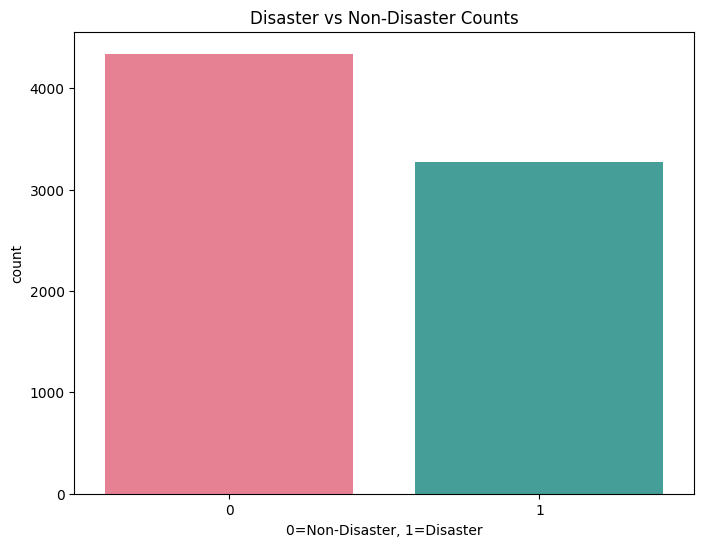

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='target',data=train_data,palette='husl',hue='target',legend=False)
plt.title('Disaster vs Non-Disaster Counts')
plt.xlabel('0=Non-Disaster, 1=Disaster')

## Text Precessing

In [11]:
# clean the email message
def clean_the_text(text):
    text = re.sub(r'\W',' ',text) # remove the non-word characters

    text = text.lower() #convert to lowcase
    text = re.sub(r'\s+[a-z]\s+',' ',text) #remove single characters
    text = re.sub(r'\s+',' ',text) #remove extra spaces
    return text

train_df.loc[:,'text'] = train_df.loc[:,'text'].apply(clean_the_text)
test_df.loc[:,'text'] = test_df.loc[:,'text'].apply(clean_the_text)

#lemmatization
lemmatizer = WordNetLemmatizer()
train_df.loc[:,'text'] = train_df.loc[:,'text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print('train_df:','\n',train_df.text[:5])
test_df.loc[:,'text'] = test_df.loc[:,'text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print('\n','test_df:','\n',test_df.text[:5])



train_df: 
 0    our deed are the reason of this earthquake may...
1                forest fire near la ronge sask canada
2    all resident asked to shelter in place are bei...
3    13 000 people receive wildfire evacuation orde...
4    just got sent this photo from ruby alaska a sm...
Name: text, dtype: object

 test_df: 
 0                     just happened terrible car crash
1    heard about earthquake is different city stay ...
2    there is forest fire at spot pond goose are fl...
3                 apocalypse lighting spokane wildfire
4         typhoon soudelor kill 28 in china and taiwan
Name: text, dtype: object


## Get text into matrix for later model 

In [12]:
counter_vector = feature_extraction.text.CountVectorizer()
train_vector = counter_vector.fit_transform(train_df.text)
test_vector = counter_vector.fit_transform(test_data.text)
print('train_vector:',train_vector.shape,)
print("train_df['target'].shape:",train_df['target'].shape)




train_vector: (7613, 20398)
train_df['target'].shape: (7613,)


## Tokenizer the text

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 30
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.text)
print('number of words:',len(tokenizer.index_word))
print(tokenizer.word_index)
# print(tokenizer.word_counts)
sequences = tokenizer.texts_to_sequences(train_df.text)
train_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

print('train_pad:',train_pad.shape)

sequences1 = tokenizer.texts_to_sequences(test_df.text)
test_pad = pad_sequences(sequences1,maxlen=MAX_LEN,truncating='post',padding='post')
print('test_pad:',test_pad.shape)
pd.DataFrame(train_pad).tail()

number of words: 20450
{'co': 1, 'http': 2, 'the': 3, 'in': 4, 'to': 5, 'of': 6, 'and': 7, 'is': 8, 'you': 9, 'for': 10, 'it': 11, 'on': 12, 'my': 13, 'that': 14, 'with': 15, 'at': 16, 'by': 17, 'a': 18, 'this': 19, 'û': 20, 'from': 21, 'be': 22, 'are': 23, 'wa': 24, 'have': 25, 'i': 26, 'fire': 27, 'like': 28, 'amp': 29, 'up': 30, 'me': 31, 'just': 32, 'but': 33, 'so': 34, 'not': 35, 'we': 36, 'your': 37, 'out': 38, 'all': 39, 'no': 40, 'after': 41, 'will': 42, 'ha': 43, 'can': 44, 'get': 45, 'an': 46, 'he': 47, 'when': 48, 'if': 49, 'they': 50, 'new': 51, 'now': 52, 'what': 53, 'via': 54, 'more': 55, '2': 56, 'about': 57, 'm': 58, 'one': 59, 'or': 60, 'people': 61, 'news': 62, 'there': 63, 'how': 64, 'been': 65, 'don': 66, 'who': 67, 'over': 68, 'year': 69, 'video': 70, 'into': 71, 're': 72, 'do': 73, 'time': 74, 'disaster': 75, 'emergency': 76, 'body': 77, 'day': 78, 'u': 79, 'police': 80, 'home': 81, 'building': 82, 'than': 83, 'would': 84, '3': 85, 'her': 86, 'family': 87, 'life':

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
7608,121,837,1202,1098,376,165,71,693,81,2,...,0,0,0,0,0,0,0,0,0,0
7609,6300,6301,6302,3,38,6,757,292,27,4,...,6303,0,0,0,0,0,0,0,0,0
7610,2705,2339,719,1220,1568,1569,6,557,1570,2,...,0,0,0,0,0,0,0,0,0,0
7611,80,1152,41,46,2238,381,15,110,4,298,...,0,0,0,0,0,0,0,0,0,0
7612,3,229,55,81,567,17,214,98,162,691,...,0,0,0,0,0,0,0,0,0,0


## Use GloVe to vectorize text word

In [14]:
embedding_dict={}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [15]:
from tqdm import tqdm
num_words = len(tokenizer.word_index)+1
embedding_matrix=np.zeros((num_words,100))
word_index = tokenizer.word_index

for word, i in tqdm(word_index.items()):
    if i>num_words:
        continue
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 20450/20450 [00:00<00:00, 793464.54it/s]


## Build the model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Input
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
model = Sequential()

# embedding= Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),input_length=MAX_LEN,trainable=False)
embedding= Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),trainable=False)#
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

# model.summary()

In [31]:
train1 = train_pad[:train_data.shape[0]]
test1 = train_pad[train_data.shape[0]:]
train_data.shape[0]


7613

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(train1,train_df['target'].values,test_size=0.2,random_state=42)
print('train shape: ',X_train.shape)
print('test shape: ',X_test.shape)

train shape:  (6090, 30)
test shape:  (1523, 30)


In [33]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1523/1523 - 6s - 4ms/step - accuracy: 0.5571 - loss: 0.6898 - val_accuracy: 0.5778 - val_loss: 0.6846
Epoch 2/15
1523/1523 - 5s - 3ms/step - accuracy: 0.5731 - loss: 0.6818 - val_accuracy: 0.5765 - val_loss: 0.6735
Epoch 3/15
1523/1523 - 5s - 3ms/step - accuracy: 0.5905 - loss: 0.6684 - val_accuracy: 0.6225 - val_loss: 0.6466
Epoch 4/15
1523/1523 - 5s - 3ms/step - accuracy: 0.6540 - loss: 0.6401 - val_accuracy: 0.7492 - val_loss: 0.5909
Epoch 5/15
1523/1523 - 5s - 3ms/step - accuracy: 0.7059 - loss: 0.6028 - val_accuracy: 0.7610 - val_loss: 0.5462
Epoch 6/15
1523/1523 - 5s - 3ms/step - accuracy: 0.7038 - loss: 0.5918 - val_accuracy: 0.7636 - val_loss: 0.5300
Epoch 7/15
1523/1523 - 5s - 3ms/step - accuracy: 0.7248 - loss: 0.5728 - val_accuracy: 0.7649 - val_loss: 0.5159
Epoch 8/15
1523/1523 - 5s - 3ms/step - accuracy: 0.7304 - loss: 0.5626 - val_accuracy: 0.7807 - val_loss: 0.5052
Epoch 9/15
1523/1523 - 5s - 3ms/step - accuracy: 0.7325 - loss: 0.5534 - val_accuracy: 0.7827 - 

## Result and Analysis

## LSTM model performance

In [34]:
def performance_plot(history,arr):
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    for ide in range(2):
        ax[ide].plot(history.history[arr[ide][0]])
        ax[ide].plot(history.history[arr[ide][1]])
        ax[ide].legend([arr[ide][0],arr[ide]][1],fontsize=18)
        ax[ide].set_xlabel('epochs',fontsize=16)
        ax[ide].set_ylabel('loss & accuracy',fontsize=16)
        ax[ide].set_title(arr[ide][0]+' X '+arr[ide][1],fontsize=16)

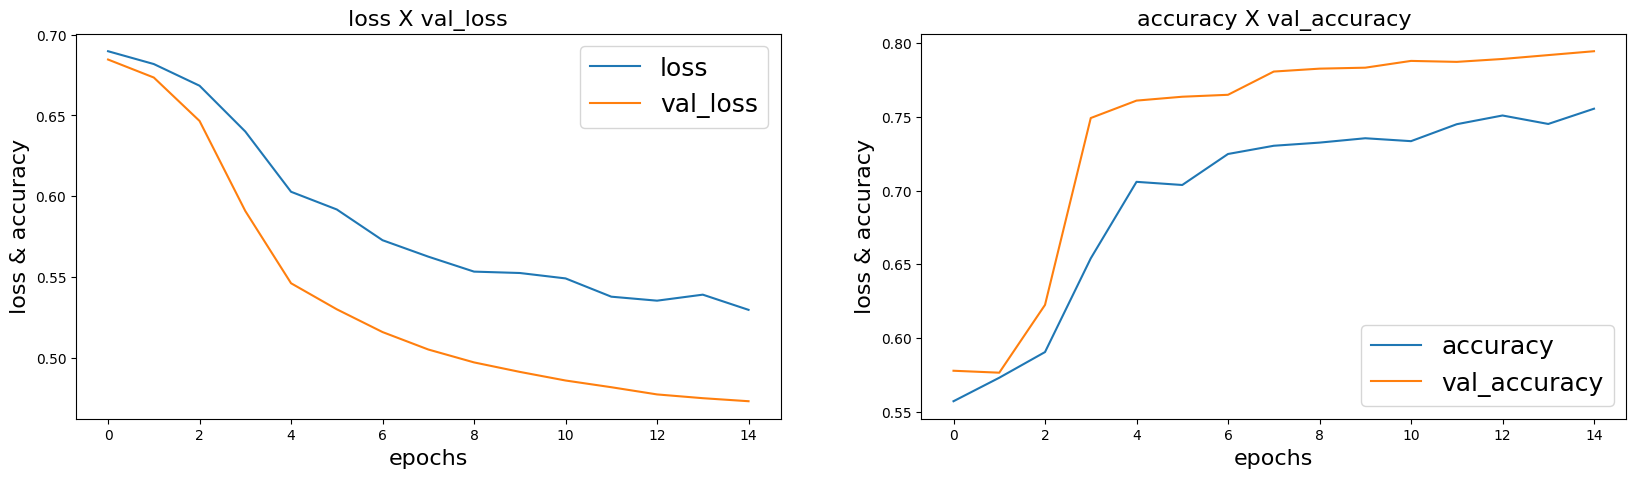

In [35]:
performance_plot(history,[['loss','val_loss'],['accuracy','val_accuracy']])

## Confusion Matrix

In [36]:
y_pred = model.predict(X_test).round()

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [37]:
from sklearn.metrics import confusion_matrix
conm = confusion_matrix(y_test,y_pred)
conm

array([[742, 132],
       [181, 468]])

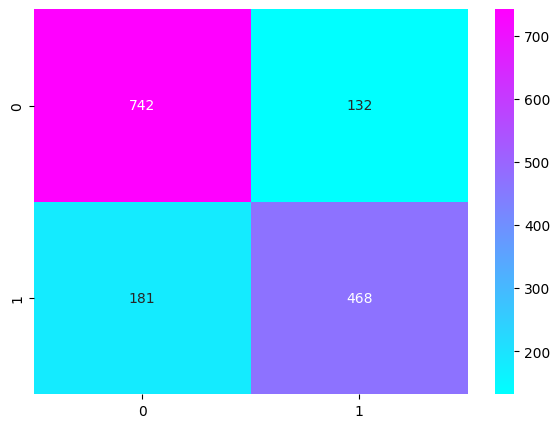

In [38]:
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='cool')
plt.show()

## Small trail at RidgeClassifier 

In [ ]:
from sklearn import linear_model,model_selection,preprocessing
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vector, train_df["target"], cv=3, scoring="f1")
scores

array([0.60381356, 0.55880893, 0.63574879])

## Submission

In [210]:
sample_sub=pd.read_csv('sample_submission.csv')

In [211]:
sub = model.predict(test_pad)
sub = np.round(sub).astype(int).reshape(3263)
# print(sub.shape)
sub1 = pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':sub})
sub1.to_csv('sample_submission.csv',index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [212]:
sub1.tail()

,id,target
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0
3262,10875,1


## Conclusion

the LSTM get better accuracy at 0.7555, which is not good yet, probabliy still further data clean up, also increase epochs time can do better
also change the model like GRU might help increase the accuracy further.